# Assignment Nov 2019 Machine Learning and Statistics - GMIT 

## Introduction and Overview

This assignment concerns the well known Boston House Prices Dataset. The dataset was created from data taken by the US Census Service in 1978. It contains information about house pricing and other associated characteristics in Boston. More information can be seen in the following Print and Describe commands below. 

This assignment consists of the following sections:
1. Loading the dataset and presenting it in some sort of readable/understandable format.
2. Description - Descriptive statistics and plots to describe the dataset.
3. Infer - Inferential statistics to analyse whether there is a significant difference in median house prices between those that are along the Charles river and those that are not.
4. Predict - Create a neural network that can predict the median house price based on other variables in the dataset. 

In [109]:
# importing modules/libraries 

from sklearn.datasets import load_boston
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import set_option # to set precision
from scipy import stats
from scipy.stats import pearsonr


## Section 1 - Loading the Dataset

In [110]:
boston = load_boston() # load the dataset built into sklearn

In [111]:
print (boston.data.shape) # print the shape of it, what is it, what's in it

(506, 13)


So it looks like the dataset has 506 rows and 13 columns.

In [112]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The dataset has 13 columns but in the DESCR output above there are 14 attributes. It mentions that MEDV (median value of houses) is usually the target. Opening the above link to the dataset gives a number of files. They are Housing names and Housing data. Opening these in a text editor doesn't simplify anything and the text above only gives a little background of the data itself. 

In [113]:
print(boston.feature_names) 
# ouput the feature names to check/understand what is in the columns since there are 14 attributs and 13 are listed 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [114]:
print (boston.keys()) # what else is in the dataset?

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


The following print commands can be used to view the contents of each of the keys 

In [115]:
#print (boston.data)
#print (boston.target)
#print (boston.feature_names)
#print (boston.filename)

In [116]:
bos = pd.DataFrame(boston.data) 
# pass to pandas because it's still not 100% clear what is in this dataset
# is easier to work with pandas

In [117]:
(bos.head(2)) # ok but what does this mean, there are only 13 here. Where is the price/ what are these numbers?

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.9,4.98
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.9,9.14


In [118]:
bos.columns = boston.feature_names # add attributes to column names 
bos['MEDV'] = boston.target # add the median value (target value as described above)

(bos.head(2))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.9,4.98,24.0
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.9,9.14,21.6


It's useful to check if any values are missing from the dataset. In this case (below), there is no missing data. 

In [119]:
pd.isnull(bos).any() # check for missing data

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [120]:
bos.dtypes # didn't know what a dtype is 
# taken from https://mode.com/example-gallery/python_histogram/

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Section 2  - Descriptive Statistics

In [121]:
set_option('precision', 3) #easier to look at decimal precison
(bos.describe()) # summary statistics. To swap rows with columns add (.T)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


In [122]:
# just want to check what the difference is between mean and median on the MEDV column because
# slightly confusing terminology between mean of median value and median of median values etc. etc.  
median_price = np.median(boston.target)
mean_price = np.mean(boston.target)
print (median_price)
print (mean_price)

21.2
22.532806324110677


The summary is well presented using pandas and makes it infinitely easier to view the dataset. However, very little can be derived from just the summary. I'm certainly no expert on either boston or the housing market. Viewing the data graphically or understanding each attributes relationship to one another may give some insight into each attribute i.e. shape, distribution, outliers etc. 

In [123]:
corr = bos.corr(method='pearson') # create a correlation plot. I'm using the set_option ('precision',3) as above in the summary table
corr # call it, don't use print, html included in Jupyter and it looks better.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


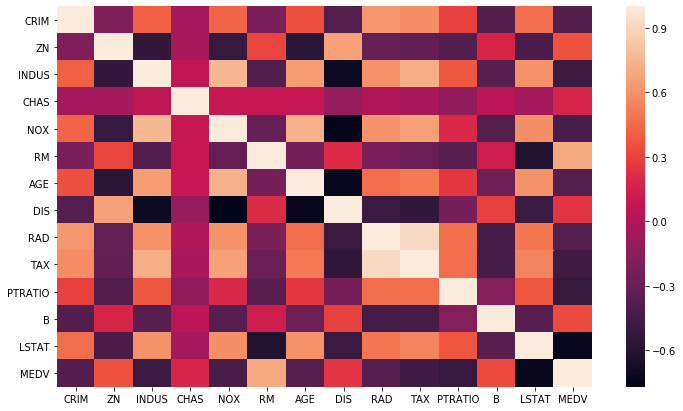

In [142]:
plt.figure(figsize=(12,7)) # use pyplot to change the default size of the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) # seaborn heatmap

Looking at the correlation table and correlation plot, it looks like the following as examples (there are more):
1. RAD and TAX are strongly positively correlated so as accessibility to radial highways increases, so does full value property tax.  
2. INDUS and NOX are strongly positively correlated. It looks like nitric oxides concentration is higher where non retail businesses are present, i.e. industrial.
3. MEDV and RM have a strong positive correlation. This makes sense, more rooms equals higher house value.
4. MEDV and LSTAT are strongly negatively correlated. The more % lower status of the population, the less the value of the property.
5. CRIM (per capita crime rate by town)has a strong relationship with accessibility to highways RAD so access to highways is connected to a higer crime rate. 

 

So it might be a good idea to take a look at these initially as opposed to tryign to analyse everything at once.

 Exploring the distributions:

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

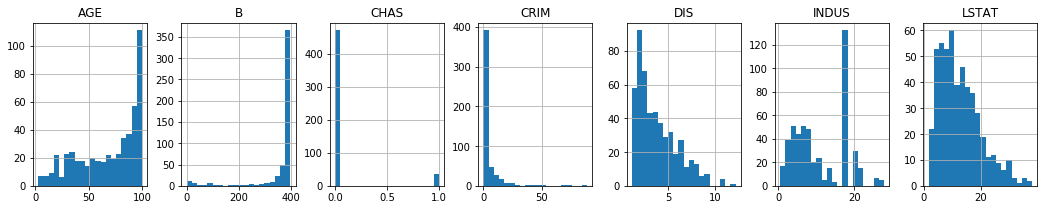

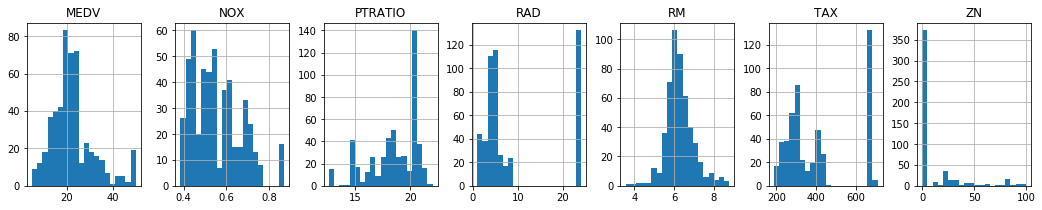

In [125]:
# plot histograms to view the distributions of each attribute
split1 = ['AGE','B','CHAS','CRIM','DIS','INDUS','LSTAT'] # just splitting them to view it easier
split2 = ['MEDV','RAD','RM','TAX','ZN','PTRATIO','NOX']
hist = bos[split1].hist(bins=20,figsize=(18,3), layout=(1,7))
hist2 = bos[split2].hist(bins=20,figsize=(18,3), layout=(1,7))
plt.hist # plot it



MEDV and RM look like a normal distribution. AGE and B are skewed to the right. CHAS is attribute/categorical(either a yes or no/1 or 0 etc.). There does seem to be some noise or outliers in some of the attributes.

In summary, the attributes are not all the same distribution.

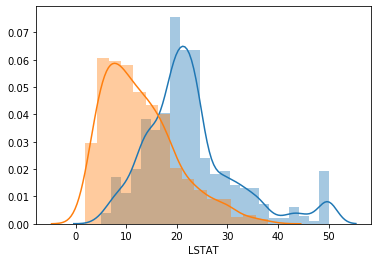

In [126]:
sns.distplot(bos['MEDV'])
sns.distplot(bos['LSTAT'])

The following code as per the seaborn website provides a pair plot, however it's too busy. It's impossible to read and follow. 
It might be better to identify correlations or relationships of meaning as above, then split the dataset and just visualise those attributes that you are intersted in.

In [127]:
#sns.pairplot(bos), 
#plot_kws={'alpha': 0.9},
#diag_kws={'bins': 30}

In [128]:
attrs = ['RAD','TAX','MEDV','RM','LSTAT'] # just give me these columns/ attributes
#bos[attrs].head() # just checking it works. I don't actually want to see it again

ValueError: markers must be a singleton or a list of markers for each level of the hue variable

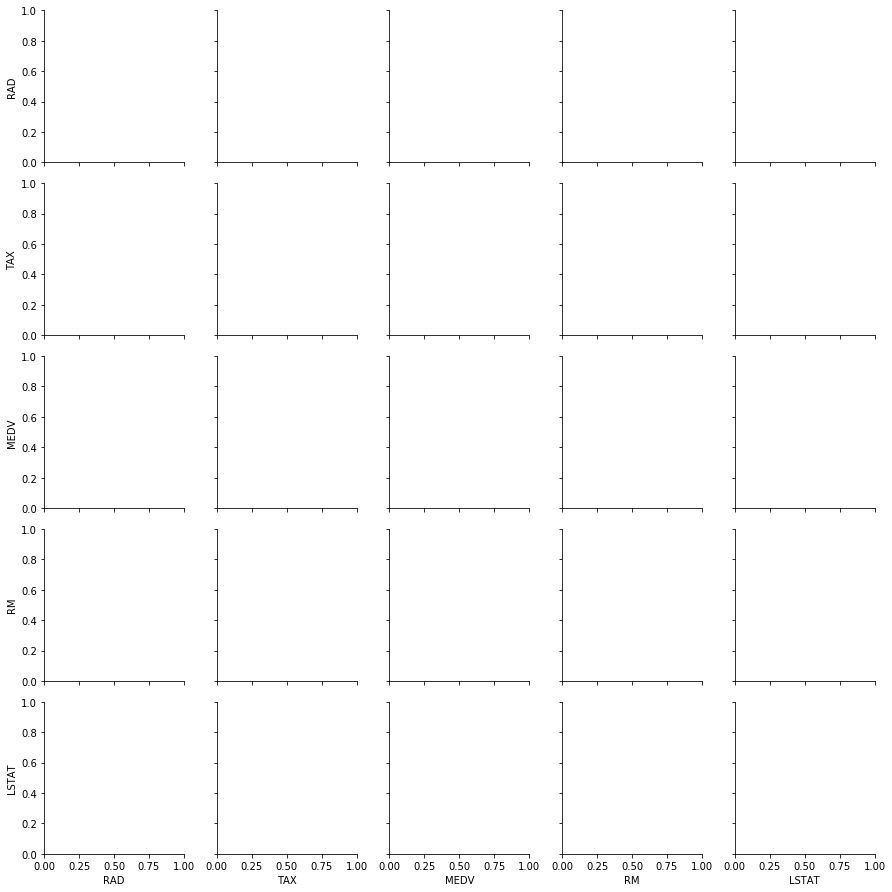

In [159]:
# create a pairplot - all variables paired with all other variables. This is a sample of attributes as defined above. 
sns.pairplot(bos[attrs],plot_kws={'alpha':0.6},diag_kws={'bins':30},markers = ["o","s"])


From the pairplot above, it appears that the data is not normalised and possibly needs to be transformed to determine relationships between features or when making predictions. 

Outlier Detection:

Box plots can be easily displayed to understand distributions using the following code. Here is a quick example:

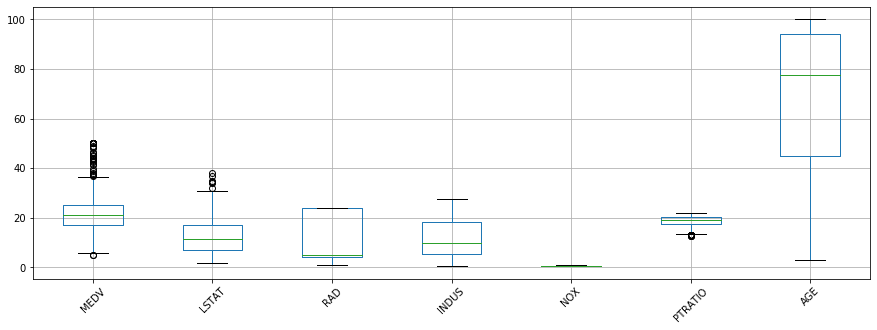

In [130]:
# a quick boxplot of selected attributes using Pandas.
boxplot = bos.boxplot(column=['MEDV', 'LSTAT', 'RAD', 'INDUS', 'NOX', 'PTRATIO','AGE'],grid = True,rot=45, figsize = (15,5))


## Section 3 - Inferential Statistics